In [5]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import random

In [6]:
#Loading Insurance dataset from Kaggle
url = "data\insurance.csv"
df = pd.read_csv(url)

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.shape

(1338, 7)

In [11]:
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

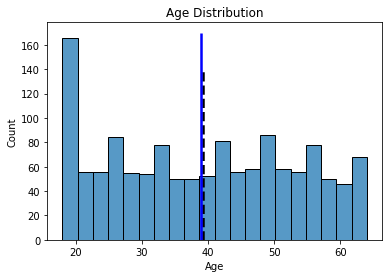

In [39]:
# Plotting age distribution
sns.histplot(df['age'], bins= 20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.vlines(np.mean(df['age']), 0, 140, lw=2.5, linestyles='dashed', color="black")
plt.vlines(np.median(df['age']), 0, 170, lw=2.5, color="blue")
plt.show()

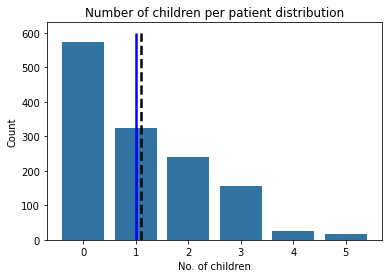

In [40]:
# Plotting children distribution
sns.countplot(x = 'children', data = df)
plt.title("Number of children per patient distribution")
plt.xlabel("No. of children")
plt.ylabel("Count")
plt.vlines(np.mean(df['children']), 0, 600, lw=2.5, linestyles='dashed', color="black")
plt.vlines(np.median(df['children']), 0,600, lw=2.5, color="blue")
plt.show()

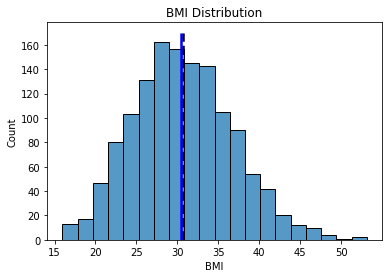

In [41]:
# Plotting BMI distribution
sns.histplot(x ='bmi', data = df, bins=20)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.vlines(np.mean(df['bmi']), 0, 170, lw=2.5, linestyles='dashed', color="black")
plt.vlines(np.median(df['bmi']), 0, 170, lw=2.5, color="blue")
plt.show()

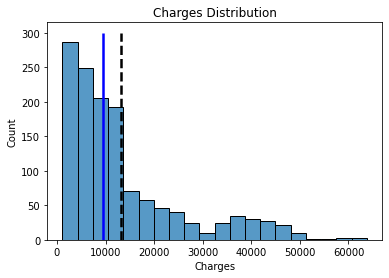

In [43]:
# Plotting charges distribution
sns.histplot(x ='charges', data = df, bins=20)
plt.title("Charges Distribution")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.vlines(np.mean(df['charges']), 0, 300, lw=2.5, linestyles='dashed', color="black")
plt.vlines(np.median(df['charges']), 0, 300, lw=2.5, color="blue")
plt.show()

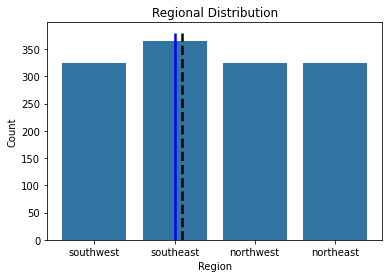

In [45]:
# Plotting region distribution
sns.countplot(x = 'region', data = df)
plt.title("Regional Distribution")
plt.xlabel("Region")
plt.ylabel("Count")
plt.vlines(np.mean(df['children']), 0, 380, lw=2.5, linestyles='dashed', color="black")
plt.vlines(np.median(df['children']), 0, 380, lw=2.5, color="blue")
plt.show()

In [18]:
# Splitting dataset into subsets, smokers vs non-smokers
yes_sm = df[df.smoker == 'yes']
no_sm = df[df.smoker == 'no']

Average insurance charges of people who smoke:  32050.23183153284
Average insurance charges of people who don't smoke:  8434.268297856204


Text(0, 0.5, 'Charges')

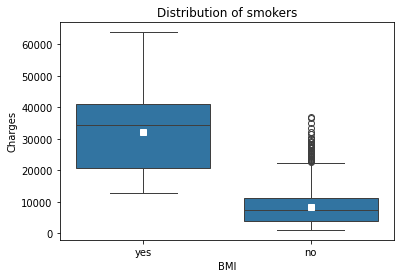

In [19]:
price_yes_sm = yes_sm.charges
avg_price_yes_sm = np.mean(price_yes_sm)
print("Average insurance charges of people who smoke: ", avg_price_yes_sm)

price_no_sm = no_sm.charges
avg_price_no_sm = np.mean(price_no_sm)
print("Average insurance charges of people who don't smoke: ", avg_price_no_sm)

sns.boxplot(data=df, x=df.smoker, y=df.charges, showmeans = True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"white"
                                                                            })
plt.title("Distribution of smokers")
plt.xlabel("BMI")
plt.ylabel("Charges")

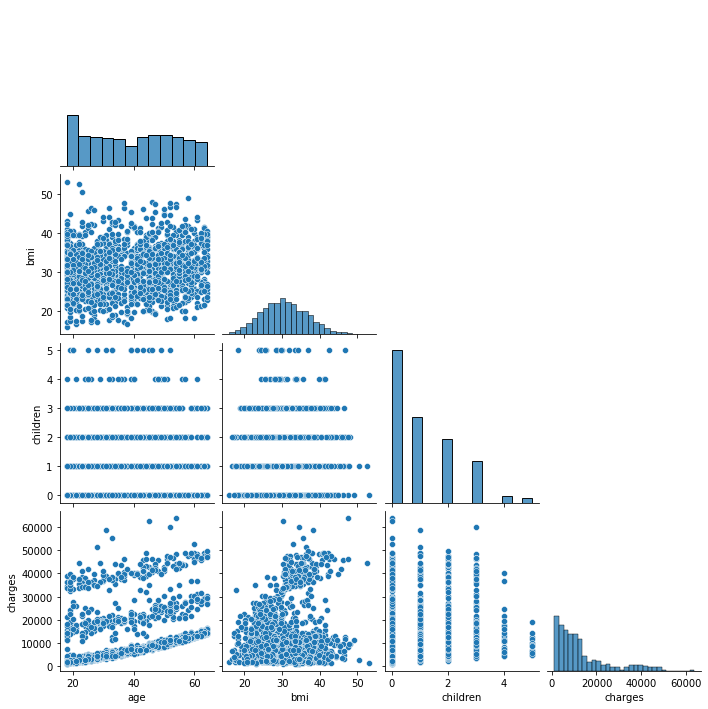

In [21]:
sns.pairplot(data=df, corner=True)

In [22]:
from scipy.stats import chi2_contingency
freq_table = pd.crosstab(df.bmi, df.charges)
chi2, pval, dof, expected = chi2_contingency(freq_table)
print(chi2)
print(pval)

731886.0000000001
0.18272996423316185


In [23]:
# Converting categorical data in 'sex' column to binary
df_temp1 = pd.get_dummies(df["sex"])

df_temp2 = pd.concat((df_temp1, df), axis=1)
df_temp2 = df_temp2.drop(["sex"], axis=1)
df_temp2 = df_temp2.drop(["male"], axis=1)
data_1 = df_temp2.rename(columns={"female": "sex"})
data_1.head()

# 1 --> female, 0 --> male

,sex,age,bmi,children,smoker,region,charges
0,True,19,27.900,0,yes,southwest,16884.92400
1,False,18,33.770,1,no,southeast,1725.55230
2,False,28,33.000,3,no,southeast,4449.46200
3,False,33,22.705,0,no,northwest,21984.47061
4,False,32,28.880,0,no,northwest,3866.85520


In [24]:
# Converting categorical data in 'smoker' column to binary
df_temp1 = pd.get_dummies(data_1["smoker"])

df_temp2 = pd.concat((df_temp1, data_1), axis=1)
df_temp2 = df_temp2.drop(["smoker"], axis=1)
df_temp2 = df_temp2.drop(["no"], axis=1)
data = df_temp2.rename(columns={"yes": "smoker"})
data.head()

,smoker,sex,age,bmi,children,region,charges
0,True,True,19,27.900,0,southwest,16884.92400
1,False,False,18,33.770,1,southeast,1725.55230
2,False,False,28,33.000,3,southeast,4449.46200
3,False,False,33,22.705,0,northwest,21984.47061
4,False,False,32,28.880,0,northwest,3866.85520


In [25]:
data.corr(numeric_only=True)

,smoker,sex,age,bmi,children,charges
smoker,1.000000,-0.076185,-0.025019,0.003750,0.007673,0.787251
sex,-0.076185,1.000000,0.020856,-0.046371,-0.017163,-0.057292
age,-0.025019,0.020856,1.000000,0.109272,0.042469,0.299008
bmi,0.003750,-0.046371,0.109272,1.000000,0.012759,0.198341
children,0.007673,-0.017163,0.042469,0.012759,1.000000,0.067998
charges,0.787251,-0.057292,0.299008,0.198341,0.067998,1.000000


<Axes: >

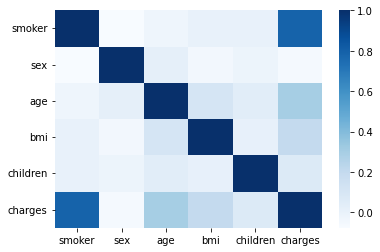

In [26]:
sns.heatmap(data.corr(numeric_only=True), cmap="Blues")

In [27]:
# LINEAR REGRESSION

In [28]:
# x = data.drop(['charges', 'region'],axis=1) 
x = data[['smoker', 'sex', 'age', 'bmi', 'children']]
y = data['charges']

In [29]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
# Making predictions using test data
y_pred = model.predict(x_test)


# Evaluating the model using MSE and R squared values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

33979257.0508082
0.7811302113434097


In [31]:
# Random forest

In [32]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(x_train3, y_train3)

RandomForestRegressor(random_state=42)

In [34]:
# Make predictions on the testing data
y_pred3 = rf_model.predict(x_test3)

# Evaluate the model
mse3 = mean_squared_error(y_test3, y_pred3)
r2_3 = r2_score(y_test3, y_pred3)

print("Mean Squared Error:", mse3)
print("R-squared:", r2_3)

Mean Squared Error: 22126695.257957976
R-squared: 0.8574758386407141
